This first example is just following the simple quickstart example on the cobaya website. Here I explore what the parameters here do.

In [10]:
# Use dictionaries to define parameters of a distribution
info = {
    "likelihood": {
        "gaussian_mixture": {
            "means": [0.2, 0],
            "covs": [[0.1, 0.05],
                     [0.05, 0.2]],
            "derived": True}},
    "params": dict([
        ("a", {
            "prior": {"min": -0.5, "max": 3},
            "latex": r"\alpha"}),
        ("b", {
            "prior": {"dist": "norm", "loc": 0, "scale": 1},
            "ref": 0,
            "proposal": 0.5,
            "latex": r"\beta"}),
        ("derived_a", {
            "latex": r"\alpha^\prime"}),
        ("derived_b", {
            "latex": r"\beta^\prime"})]),
    "sampler": {
        "mcmc": None}}

Now the sample can be run.

In [11]:
from cobaya.run import run

updated_info, sampler = run(info)

[mcmc] Getting initial point... (this may take a few seconds)
[prior] Reference values or pdfs for some parameters were not provided. Sampling from the prior instead for those parameters.
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {gaussian_mixture: 30100.0}
[prior] *WARNING* Reference pdf not defined or improper for some parameters. Using prior's sigma instead for them.
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: a:0.7247486, b:0
[mcmc] Sampling!
[mcmc] Progress @ 2022-03-11 10:26:19 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 80 samples accepted.
[mcmc]  - Acceptance rate: 0.171
[mcmc]  - Convergence of means: R-1 = 0.336325 after 64 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 160 samples accepted.
[mcmc]  - Acceptance rate: 0

[root] *WARNING* outlier fraction 0.04583333333333333 
Mean:
[0.21482516 0.0134686 ]
Covariance matrix:
[[0.09561131 0.04797856]
 [0.04797856 0.16847464]]


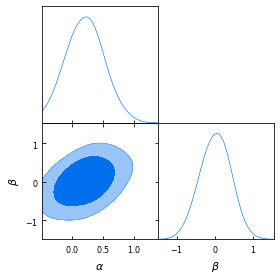

In [12]:
# Export the results to GetDist
from getdist.mcsamples import MCSamplesFromCobaya

gd_sample = MCSamplesFromCobaya(updated_info, sampler.products()["sample"])
# Analyze and plot
mean = gd_sample.getMeans()[:2]
covmat = gd_sample.getCovMat().matrix[:2, :2]
print("Mean:")
print(mean)
print("Covariance matrix:")
print(covmat)
%matplotlib inline
import getdist.plots as gdplt

gdplot = gdplt.get_subplot_plotter()
gdplot.triangle_plot(gd_sample, ["a", "b"], filled=True)

[mcmc] Getting initial point... (this may take a few seconds)
[prior] Reference values or pdfs for some parameters were not provided. Sampling from the prior instead for those parameters.
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {gaussian_mixture: 35800.0}
[prior] *WARNING* Reference pdf not defined or improper for some parameters. Using prior's sigma instead for them.
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: a:-0.2864226, b:0
[mcmc] Sampling!
[mcmc] Progress @ 2022-03-11 10:26:20 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 80 samples accepted.
[mcmc]  - Acceptance rate: 0.181
[mcmc]  - Convergence of means: R-1 = 0.525262 after 64 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 160 samples accepted.
[mcmc]  - Acceptance rate: 

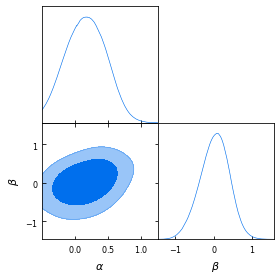

In [13]:
updated_info, sampler = run(info)

# Export the results to GetDist
from getdist.mcsamples import MCSamplesFromCobaya

gd_sample = MCSamplesFromCobaya(updated_info, sampler.products()["sample"])
# Analyze and plot
mean = gd_sample.getMeans()[:2]
covmat = gd_sample.getCovMat().matrix[:2, :2]
print("Mean:")
print(mean)
print("Covariance matrix:")
print(covmat)
%matplotlib inline
import getdist.plots as gdplt

gdplot = gdplt.get_subplot_plotter()
gdplot.triangle_plot(gd_sample, ["a", "b"], filled=True)

Now I will change means and covariance and see what happens

[mcmc] Getting initial point... (this may take a few seconds)
[prior] Reference values or pdfs for some parameters were not provided. Sampling from the prior instead for those parameters.
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {gaussian_mixture: 35200.0}
[prior] *WARNING* Reference pdf not defined or improper for some parameters. Using prior's sigma instead for them.
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: a:1.227363, b:0
[mcmc] Sampling!
[mcmc] Progress @ 2022-03-11 10:26:21 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 80 samples accepted.
[mcmc]  - Acceptance rate: 0.189
[mcmc]  - Convergence of means: R-1 = 0.367617 after 64 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 160 samples accepted.
[mcmc]  - Acceptance rate: 0.

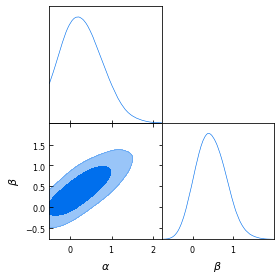

In [14]:
# Use dictionaries to define parameters of a distribution
info2 = {
    "likelihood": {
        "gaussian_mixture": {
            "means": [0.4, 0.5],
            "covs": [[0.3, 0.1],
                     [0.2, 0.2]],
            "derived": True}},
    "params": dict([
        ("a", {
            "prior": {"min": -0.5, "max": 3},
            "latex": r"\alpha"}),
        ("b", {
            "prior": {"dist": "norm", "loc": 0, "scale": 1},
            "ref": 0,
            "proposal": 0.5,
            "latex": r"\beta"}),
        ("derived_a", {
            "latex": r"\alpha^\prime"}),
        ("derived_b", {
            "latex": r"\beta^\prime"})]),
    "sampler": {
        "mcmc": None}}

updated_info2, sampler2 = run(info2)

# Export the results to GetDist
from getdist.mcsamples import MCSamplesFromCobaya

gd_sample = MCSamplesFromCobaya(updated_info2, sampler2.products()["sample"])
# Analyze and plot
mean = gd_sample.getMeans()[:2]
covmat = gd_sample.getCovMat().matrix[:2, :2]
print("Mean:")
print(mean)
print("Covariance matrix:")
print(covmat)
%matplotlib inline
import getdist.plots as gdplt

gdplot = gdplt.get_subplot_plotter()
gdplot.triangle_plot(gd_sample, ["a", "b"], filled=True)

I have been trying to read about the reason MCMC is not sufficient on its own. It could be due to decreasing computational efficiency as the distributions become more complicated. In the paper (https://arxiv.org/pdf/2105.03324.pdf) the normalizing flow seem s to converge much faster than KDE, presumably becuase normalizing flows can sample from a simple distribution and push forward the samples to the posterior.

To try to see this, I will first use the example from the cobay website for a Gaussian ring. Then I will try adjusting the prior distribution to see what happens to the rate of convergence.

[ring] Initialized external likelihood.
[mcmc] Getting initial point... (this may take a few seconds)
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {ring: 10700.0}
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: x:0.5, y:0.5
[mcmc] Sampling!
[mcmc] Progress @ 2022-03-11 10:26:22 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 80 samples accepted.
[mcmc]  - Acceptance rate: 0.719
[mcmc]  - Convergence of means: R-1 = 7.608572 after 64 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 160 samples accepted.
[mcmc]  - Acceptance rate: 0.557
[mcmc]  - Convergence of means: R-1 = 4.025080 after 128 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 240 samples accepted.
[mcmc]  - Acceptance rate: 0.43

[mcmc] Learn + convergence test @ 2960 samples accepted.
[mcmc]  - Acceptance rate: 0.097
[mcmc]  - Convergence of means: R-1 = 0.038478 after 2368 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3040 samples accepted.
[mcmc]  - Acceptance rate: 0.096
[mcmc]  - Convergence of means: R-1 = 0.032384 after 2432 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3120 samples accepted.
[mcmc]  - Acceptance rate: 0.096
[mcmc]  - Convergence of means: R-1 = 0.018391 after 2496 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3200 samples accepted.
[mcmc]  - Acceptance rate: 0.096
[mcmc]  - Convergence of means: R-1 = 0.015398 after 2560 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3280 samples accepted.
[mcmc]  - Acceptance rate: 0.096
[mcmc]  - Convergence of means: R-1 = 0.013575

[mcmc] Learn + convergence test @ 6000 samples accepted.
[mcmc]  - Acceptance rate: 0.092
[mcmc]  - Convergence of means: R-1 = 0.010583 after 4800 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6080 samples accepted.
[mcmc]  - Acceptance rate: 0.092
[mcmc]  - Convergence of means: R-1 = 0.009706 after 4864 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6160 samples accepted.
[mcmc]  - Acceptance rate: 0.092
[mcmc]  - Convergence of means: R-1 = 0.008968 after 4928 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6240 samples accepted.
[mcmc]  - Acceptance rate: 0.092
[mcmc]  - Convergence of means: R-1 = 0.005555 after 4992 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6320 samples accepted.
[mcmc]  - Acceptance rate: 0.092
[mcmc]  - Convergence of means: R-1 = 0.005198

[mcmc] Learn + convergence test @ 9040 samples accepted.
[mcmc]  - Acceptance rate: 0.091
[mcmc]  - Convergence of means: R-1 = 0.006052 after 7232 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 9120 samples accepted.
[mcmc]  - Acceptance rate: 0.091
[mcmc]  - Convergence of means: R-1 = 0.007420 after 7296 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 9200 samples accepted.
[mcmc]  - Acceptance rate: 0.091
[mcmc]  - Convergence of means: R-1 = 0.007261 after 7360 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 9280 samples accepted.
[mcmc]  - Acceptance rate: 0.091
[mcmc]  - Convergence of means: R-1 = 0.006012 after 7424 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 9360 samples accepted.
[mcmc]  - Acceptance rate: 0.091
[mcmc]  - Convergence of means: R-1 = 0.006232

[mcmc] Learn + convergence test @ 12080 samples accepted.
[mcmc]  - Acceptance rate: 0.090
[mcmc]  - Convergence of means: R-1 = 0.002152 after 9664 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 12160 samples accepted.
[mcmc]  - Acceptance rate: 0.090
[mcmc]  - Convergence of means: R-1 = 0.002246 after 9728 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 12240 samples accepted.
[mcmc]  - Acceptance rate: 0.090
[mcmc]  - Convergence of means: R-1 = 0.001852 after 9792 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 12320 samples accepted.
[mcmc]  - Acceptance rate: 0.090
[mcmc]  - Convergence of means: R-1 = 0.001665 after 9856 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 12400 samples accepted.
[mcmc]  - Acceptance rate: 0.090
[mcmc]  - Convergence of means: R-1 = 0.0

[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 15120 samples accepted.
[mcmc]  - Acceptance rate: 0.090
[mcmc]  - Convergence of means: R-1 = 0.002049 after 12096 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 15200 samples accepted.
[mcmc]  - Acceptance rate: 0.090
[mcmc]  - Convergence of means: R-1 = 0.002044 after 12160 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 15280 samples accepted.
[mcmc]  - Acceptance rate: 0.090
[mcmc]  - Convergence of means: R-1 = 0.001647 after 12224 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 15360 samples accepted.
[mcmc]  - Acceptance rate: 0.090
[mcmc]  - Convergence of means: R-1 = 0.002162 after 12288 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 15440 samples accepted.
[mcmc]  - Accepta

[mcmc]  - Convergence of means: R-1 = 0.001741 after 14464 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 18160 samples accepted.
[mcmc]  - Acceptance rate: 0.090
[mcmc]  - Convergence of means: R-1 = 0.002064 after 14528 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 18240 samples accepted.
[mcmc]  - Acceptance rate: 0.090
[mcmc]  - Convergence of means: R-1 = 0.001809 after 14592 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 18320 samples accepted.
[mcmc]  - Acceptance rate: 0.090
[mcmc]  - Convergence of means: R-1 = 0.001780 after 14656 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 18400 samples accepted.
[mcmc]  - Acceptance rate: 0.090
[mcmc]  - Convergence of means: R-1 = 0.001230 after 14720 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[

[mcmc] Learn + convergence test @ 21120 samples accepted.
[mcmc]  - Acceptance rate: 0.090
[mcmc]  - Convergence of means: R-1 = 0.001165 after 16896 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 21200 samples accepted.
[mcmc]  - Acceptance rate: 0.090
[mcmc]  - Convergence of means: R-1 = 0.001394 after 16960 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 21280 samples accepted.
[mcmc]  - Acceptance rate: 0.090
[mcmc]  - Convergence of means: R-1 = 0.001155 after 17024 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 21360 samples accepted.
[mcmc]  - Acceptance rate: 0.090
[mcmc]  - Convergence of means: R-1 = 0.000811 after 17088 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 21440 samples accepted.
[mcmc]  - Acceptance rate: 0.090
[mcmc]  - Convergence of means: R-1 =

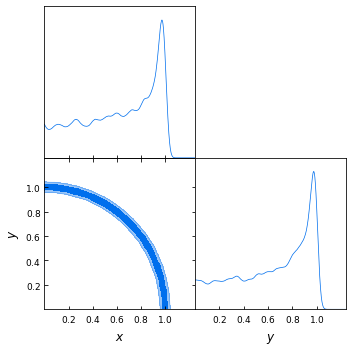

In [15]:
import numpy as np
from scipy import stats

def gauss_ring_logp(x, y, mean_radius=1, std=0.02):
    """
    Defines a gaussian ring likelihood on cartesian coordinater,
    around some ``mean_radius`` and with some ``std``.
    """
    return stats.norm.logpdf(np.sqrt(x**2 + y**2), loc=mean_radius, scale=std)

info = {"likelihood": {"ring": gauss_ring_logp}}

info["params"] = {
    "x": {"prior": {"min": 0, "max": 2}, "ref": 0.5, "proposal": 0.01},
    "y": {"prior": {"min": 0, "max": 2}, "ref": 0.5, "proposal": 0.01}}

info["sampler"] = {"mcmc": {"Rminus1_stop": 0.001, "max_tries": 1000}}

from cobaya.run import run
updated_info, sampler = run(info)

from getdist.mcsamples import MCSamplesFromCobaya
import getdist.plots as gdplt

gdsamples = MCSamplesFromCobaya(updated_info, sampler.products()["sample"])
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.triangle_plot(gdsamples, ["x", "y"], filled=True)

That already takes a while! How might this change if the prior distribution is more complicated?

[prior] *WARNING* External prior 'x_eq_y_band' loaded. Mind that it might not be normalized!
[ring] Initialized external likelihood.
[mcmc] Getting initial point... (this may take a few seconds)
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {ring: 12600.0}
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: x:0.5, y:0.5
[mcmc] Sampling!
[mcmc] Progress @ 2022-03-11 10:48:29 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 80 samples accepted.
[mcmc]  - Acceptance rate: 0.634
[mcmc]  - Convergence of means: R-1 = 5.352210 after 64 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 160 samples accepted.
[mcmc]  - Acceptance rate: 0.508
[mcmc]  - Convergence of means: R-1 = 2.044999 after 128 accepted steps
[mcmc]  - Updated covariance matrix of proposal

[mcmc]  - Convergence of means: R-1 = 0.009775 after 2304 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 2960 samples accepted.
[mcmc]  - Acceptance rate: 0.171
[mcmc]  - Convergence of means: R-1 = 0.010033 after 2368 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3040 samples accepted.
[mcmc]  - Acceptance rate: 0.170
[mcmc]  - Convergence of means: R-1 = 0.011211 after 2432 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3120 samples accepted.
[mcmc]  - Acceptance rate: 0.169
[mcmc]  - Convergence of means: R-1 = 0.009886 after 2496 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3200 samples accepted.
[mcmc]  - Acceptance rate: 0.168
[mcmc]  - Convergence of means: R-1 = 0.019608 after 2560 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Lea

[mcmc]  - Convergence of means: R-1 = 0.009644 after 4736 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6000 samples accepted.
[mcmc]  - Acceptance rate: 0.168
[mcmc]  - Convergence of means: R-1 = 0.009282 after 4800 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6080 samples accepted.
[mcmc]  - Acceptance rate: 0.168
[mcmc]  - Convergence of means: R-1 = 0.009893 after 4864 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6160 samples accepted.
[mcmc]  - Acceptance rate: 0.168
[mcmc]  - Convergence of means: R-1 = 0.012332 after 4928 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6240 samples accepted.
[mcmc]  - Acceptance rate: 0.168
[mcmc]  - Convergence of means: R-1 = 0.011626 after 4992 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Lea

[mcmc]  - Convergence of means: R-1 = 0.003840 after 7168 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 9040 samples accepted.
[mcmc]  - Acceptance rate: 0.170
[mcmc]  - Convergence of means: R-1 = 0.004722 after 7232 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 9120 samples accepted.
[mcmc]  - Acceptance rate: 0.170
[mcmc]  - Convergence of means: R-1 = 0.005423 after 7296 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 9200 samples accepted.
[mcmc]  - Acceptance rate: 0.170
[mcmc]  - Convergence of means: R-1 = 0.004779 after 7360 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 9280 samples accepted.
[mcmc]  - Acceptance rate: 0.170
[mcmc]  - Convergence of means: R-1 = 0.003688 after 7424 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Lea

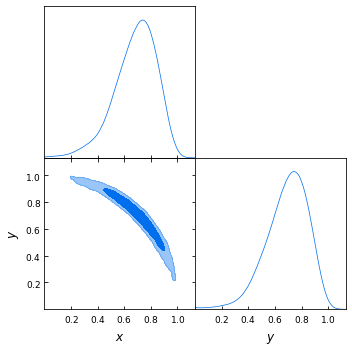

In [29]:
from scipy import stats
info = {"likelihood": {"ring": gauss_ring_logp}}

info["params"] = {
    "x": {"prior": {"min": 0, "max": 2}, "ref": 0.5, "proposal": 0.01},
    "y": {"prior": {"min": 0, "max": 2}, "ref": 0.5, "proposal": 0.01}}
info["prior"] = {"x_eq_y_band":
                 lambda x, y: stats.norm.logpdf(x - y, loc=0, scale=0.3)}

info["sampler"] = {"mcmc": {"Rminus1_stop": 0.001, "max_tries": 1000}}

updated_info_x_eq_y, sampler_x_eq_y = run(info)

gdsamples_x_eq_y = MCSamplesFromCobaya(
    updated_info_x_eq_y, sampler_x_eq_y.products()["sample"])
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.triangle_plot(gdsamples_x_eq_y, ["x", "y"], filled=True)

Now it took only half as many steps. Lets try other priors.

[prior] *WARNING* External prior 'x_eq_y_band' loaded. Mind that it might not be normalized!
[ring] Initialized external likelihood.
[mcmc] Getting initial point... (this may take a few seconds)
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {ring: 7210.0}
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: x:0.5, y:0.5
[mcmc] Sampling!
[mcmc] Progress @ 2022-03-11 10:53:33 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 80 samples accepted.
[mcmc]  - Acceptance rate: 0.703
[mcmc]  - Convergence of means: R-1 = 3.994650 after 64 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 160 samples accepted.
[mcmc]  - Acceptance rate: 0.498
[mcmc]  - Convergence of means: R-1 = 5.488437 after 128 accepted steps
[mcmc]  - Updated covariance matrix of proposal 

[mcmc]  - Convergence of means: R-1 = 0.015036 after 2304 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 2960 samples accepted.
[mcmc]  - Acceptance rate: 0.103
[mcmc]  - Convergence of means: R-1 = 0.012111 after 2368 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3040 samples accepted.
[mcmc]  - Acceptance rate: 0.102
[mcmc]  - Convergence of means: R-1 = 0.019757 after 2432 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3120 samples accepted.
[mcmc]  - Acceptance rate: 0.102
[mcmc]  - Convergence of means: R-1 = 0.027071 after 2496 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3200 samples accepted.
[mcmc]  - Acceptance rate: 0.101
[mcmc]  - Convergence of means: R-1 = 0.029627 after 2560 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Lea

[mcmc]  - Convergence of means: R-1 = 0.004805 after 4736 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6000 samples accepted.
[mcmc]  - Acceptance rate: 0.098
[mcmc]  - Convergence of means: R-1 = 0.007330 after 4800 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6080 samples accepted.
[mcmc]  - Acceptance rate: 0.098
[mcmc]  - Convergence of means: R-1 = 0.011919 after 4864 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6160 samples accepted.
[mcmc]  - Acceptance rate: 0.098
[mcmc]  - Convergence of means: R-1 = 0.010562 after 4928 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6240 samples accepted.
[mcmc]  - Acceptance rate: 0.098
[mcmc]  - Convergence of means: R-1 = 0.015179 after 4992 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Lea

[mcmc]  - Convergence of means: R-1 = 0.006638 after 7168 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 9040 samples accepted.
[mcmc]  - Acceptance rate: 0.097
[mcmc]  - Convergence of means: R-1 = 0.006382 after 7232 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 9120 samples accepted.
[mcmc]  - Acceptance rate: 0.096
[mcmc]  - Convergence of means: R-1 = 0.008148 after 7296 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 9200 samples accepted.
[mcmc]  - Acceptance rate: 0.097
[mcmc]  - Convergence of means: R-1 = 0.008241 after 7360 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 9280 samples accepted.
[mcmc]  - Acceptance rate: 0.097
[mcmc]  - Convergence of means: R-1 = 0.006010 after 7424 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Lea

[mcmc]  - Acceptance rate: 0.096
[mcmc]  - Convergence of means: R-1 = 0.004264 after 9600 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 12080 samples accepted.
[mcmc]  - Acceptance rate: 0.096
[mcmc]  - Convergence of means: R-1 = 0.003885 after 9664 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 12160 samples accepted.
[mcmc]  - Acceptance rate: 0.096
[mcmc]  - Convergence of means: R-1 = 0.005839 after 9728 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 12240 samples accepted.
[mcmc]  - Acceptance rate: 0.096
[mcmc]  - Convergence of means: R-1 = 0.005312 after 9792 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 12320 samples accepted.
[mcmc]  - Acceptance rate: 0.096
[mcmc]  - Convergence of means: R-1 = 0.003914 after 9856 accepted steps
[mcmc]  - Updated covarian

[mcmc] Learn + convergence test @ 15040 samples accepted.
[mcmc]  - Acceptance rate: 0.096
[mcmc]  - Convergence of means: R-1 = 0.002119 after 12032 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 15120 samples accepted.
[mcmc]  - Acceptance rate: 0.096
[mcmc]  - Convergence of means: R-1 = 0.001794 after 12096 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 15200 samples accepted.
[mcmc]  - Acceptance rate: 0.096
[mcmc]  - Convergence of means: R-1 = 0.002266 after 12160 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 15280 samples accepted.
[mcmc]  - Acceptance rate: 0.096
[mcmc]  - Convergence of means: R-1 = 0.002317 after 12224 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 15360 samples accepted.
[mcmc]  - Acceptance rate: 0.096
[mcmc]  - Convergence of means: R-1 =

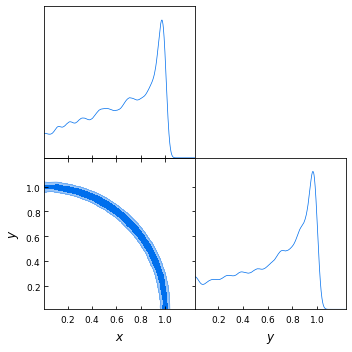

In [32]:
info = {"likelihood": {"ring": gauss_ring_logp}}

info["params"] = {
    "x": {"prior": {"min": 0.01, "max": 2}, "ref": 0.5, "proposal": 0.01},
    "y": {"prior": {"min": 0.01, "max": 2}, "ref": 0.5, "proposal": 0.01}}
info["prior"] = {"x_eq_y_band":
                 lambda x, y: stats.norm.logpdf(1/(x+y), loc=0, scale=0.7)}

info["sampler"] = {"mcmc": {"Rminus1_stop": 0.001, "max_tries": 1000}}

updated_info_x_eq_y, sampler_x_eq_y = run(info)

gdsamples_x_eq_y = MCSamplesFromCobaya(
    updated_info_x_eq_y, sampler_x_eq_y.products()["sample"])
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.triangle_plot(gdsamples_x_eq_y, ["x", "y"], filled=True)

{'likelihood': {'band': <function band_logp at 0x7f503a740940>}, 'params': {'x': {'prior': {'min': 0, 'max': 2}, 'ref': 0.5, 'proposal': 0.01}, 'y': {'prior': {'min': 0, 'max': 2}, 'ref': 0.5, 'proposal': 0.01}}, 'sampler': {'mcmc': {'Rminus1_stop': 0.001, 'max_tries': 1000}}}
[band] Initialized external likelihood.
[mcmc] Getting initial point... (this may take a few seconds)
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {band: 11000.0}
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: x:0.5, y:0.5
[mcmc] Sampling!
[mcmc] Progress @ 2022-03-11 11:11:23 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 80 samples accepted.
[mcmc]  - Acceptance rate: 0.164
[mcmc]  - Convergence of means: R-1 = 1.616481 after 64 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + converge

[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 2880 samples accepted.
[mcmc]  - Acceptance rate: 0.093
[mcmc]  - Convergence of means: R-1 = 0.029441 after 2304 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 2960 samples accepted.
[mcmc]  - Acceptance rate: 0.093
[mcmc]  - Convergence of means: R-1 = 0.026589 after 2368 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3040 samples accepted.
[mcmc]  - Acceptance rate: 0.092
[mcmc]  - Convergence of means: R-1 = 0.031303 after 2432 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3120 samples accepted.
[mcmc]  - Acceptance rate: 0.092
[mcmc]  - Convergence of means: R-1 = 0.013340 after 2496 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3200 samples accepted.
[mcmc]  - Acceptance rate:

[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 5920 samples accepted.
[mcmc]  - Acceptance rate: 0.099
[mcmc]  - Convergence of means: R-1 = 0.004922 after 4736 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6000 samples accepted.
[mcmc]  - Acceptance rate: 0.099
[mcmc]  - Convergence of means: R-1 = 0.005592 after 4800 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6080 samples accepted.
[mcmc]  - Acceptance rate: 0.099
[mcmc]  - Convergence of means: R-1 = 0.005434 after 4864 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6160 samples accepted.
[mcmc]  - Acceptance rate: 0.099
[mcmc]  - Convergence of means: R-1 = 0.002674 after 4928 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6240 samples accepted.
[mcmc]  - Acceptance rate:

[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 8960 samples accepted.
[mcmc]  - Acceptance rate: 0.093
[mcmc]  - Convergence of means: R-1 = 0.028428 after 7168 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 9040 samples accepted.
[mcmc]  - Acceptance rate: 0.093
[mcmc]  - Convergence of means: R-1 = 0.032519 after 7232 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 9120 samples accepted.
[mcmc]  - Acceptance rate: 0.093
[mcmc]  - Convergence of means: R-1 = 0.021555 after 7296 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 9200 samples accepted.
[mcmc]  - Acceptance rate: 0.092
[mcmc]  - Convergence of means: R-1 = 0.020673 after 7360 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 9280 samples accepted.
[mcmc]  - Acceptance rate:

[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 12000 samples accepted.
[mcmc]  - Acceptance rate: 0.091
[mcmc]  - Convergence of means: R-1 = 0.019404 after 9600 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 12080 samples accepted.
[mcmc]  - Acceptance rate: 0.091
[mcmc]  - Convergence of means: R-1 = 0.020063 after 9664 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 12160 samples accepted.
[mcmc]  - Acceptance rate: 0.091
[mcmc]  - Convergence of means: R-1 = 0.014165 after 9728 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 12240 samples accepted.
[mcmc]  - Acceptance rate: 0.091
[mcmc]  - Convergence of means: R-1 = 0.016156 after 9792 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 12320 samples accepted.
[mcmc]  - Acceptance 

[mcmc]  - Convergence of means: R-1 = 0.021513 after 11968 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 15040 samples accepted.
[mcmc]  - Acceptance rate: 0.091
[mcmc]  - Convergence of means: R-1 = 0.019790 after 12032 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 15120 samples accepted.
[mcmc]  - Acceptance rate: 0.091
[mcmc]  - Convergence of means: R-1 = 0.019530 after 12096 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 15200 samples accepted.
[mcmc]  - Acceptance rate: 0.090
[mcmc]  - Convergence of means: R-1 = 0.018936 after 12160 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 15280 samples accepted.
[mcmc]  - Acceptance rate: 0.090
[mcmc]  - Convergence of means: R-1 = 0.017674 after 12224 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[

[mcmc] Learn + convergence test @ 18000 samples accepted.
[mcmc]  - Acceptance rate: 0.091
[mcmc]  - Convergence of means: R-1 = 0.007949 after 14400 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 18080 samples accepted.
[mcmc]  - Acceptance rate: 0.091
[mcmc]  - Convergence of means: R-1 = 0.008404 after 14464 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 18160 samples accepted.
[mcmc]  - Acceptance rate: 0.091
[mcmc]  - Convergence of means: R-1 = 0.005623 after 14528 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 18240 samples accepted.
[mcmc]  - Acceptance rate: 0.091
[mcmc]  - Convergence of means: R-1 = 0.005876 after 14592 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 18320 samples accepted.
[mcmc]  - Acceptance rate: 0.091
[mcmc]  - Convergence of means: R-1 =

[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 21040 samples accepted.
[mcmc]  - Acceptance rate: 0.089
[mcmc]  - Convergence of means: R-1 = 0.004118 after 16832 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 21120 samples accepted.
[mcmc]  - Acceptance rate: 0.089
[mcmc]  - Convergence of means: R-1 = 0.006621 after 16896 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 21200 samples accepted.
[mcmc]  - Acceptance rate: 0.089
[mcmc]  - Convergence of means: R-1 = 0.006532 after 16960 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 21280 samples accepted.
[mcmc]  - Acceptance rate: 0.089
[mcmc]  - Convergence of means: R-1 = 0.006591 after 17024 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 21360 samples accepted.
[mcmc]  - Accepta

[mcmc]  - Convergence of means: R-1 = 0.006977 after 19200 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 24080 samples accepted.
[mcmc]  - Acceptance rate: 0.088
[mcmc]  - Convergence of means: R-1 = 0.009061 after 19264 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 24160 samples accepted.
[mcmc]  - Acceptance rate: 0.089
[mcmc]  - Convergence of means: R-1 = 0.009249 after 19328 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 24240 samples accepted.
[mcmc]  - Acceptance rate: 0.089
[mcmc]  - Convergence of means: R-1 = 0.009454 after 19392 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 24320 samples accepted.
[mcmc]  - Acceptance rate: 0.088
[mcmc]  - Convergence of means: R-1 = 0.009605 after 19456 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[

[mcmc] Learn + convergence test @ 27040 samples accepted.
[mcmc]  - Acceptance rate: 0.088
[mcmc]  - Convergence of means: R-1 = 0.005129 after 21632 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 27120 samples accepted.
[mcmc]  - Acceptance rate: 0.088
[mcmc]  - Convergence of means: R-1 = 0.005022 after 21696 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 27200 samples accepted.
[mcmc]  - Acceptance rate: 0.088
[mcmc]  - Convergence of means: R-1 = 0.005088 after 21760 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 27280 samples accepted.
[mcmc]  - Acceptance rate: 0.088
[mcmc]  - Convergence of means: R-1 = 0.004656 after 21824 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 27360 samples accepted.
[mcmc]  - Acceptance rate: 0.088
[mcmc]  - Convergence of means: R-1 =

[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 30080 samples accepted.
[mcmc]  - Acceptance rate: 0.087
[mcmc]  - Convergence of means: R-1 = 0.003721 after 24064 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 30160 samples accepted.
[mcmc]  - Acceptance rate: 0.087
[mcmc]  - Convergence of means: R-1 = 0.003601 after 24128 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 30240 samples accepted.
[mcmc]  - Acceptance rate: 0.087
[mcmc]  - Convergence of means: R-1 = 0.003336 after 24192 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 30320 samples accepted.
[mcmc]  - Acceptance rate: 0.087
[mcmc]  - Convergence of means: R-1 = 0.003354 after 24256 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 30400 samples accepted.
[mcmc]  - Accepta

[mcmc]  - Convergence of means: R-1 = 0.005304 after 26432 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 33120 samples accepted.
[mcmc]  - Acceptance rate: 0.088
[mcmc]  - Convergence of means: R-1 = 0.005193 after 26496 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 33200 samples accepted.
[mcmc]  - Acceptance rate: 0.087
[mcmc]  - Convergence of means: R-1 = 0.004869 after 26560 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 33280 samples accepted.
[mcmc]  - Acceptance rate: 0.087
[mcmc]  - Convergence of means: R-1 = 0.004761 after 26624 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 33360 samples accepted.
[mcmc]  - Acceptance rate: 0.087
[mcmc]  - Convergence of means: R-1 = 0.004643 after 26688 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[

[mcmc] Learn + convergence test @ 36080 samples accepted.
[mcmc]  - Acceptance rate: 0.088
[mcmc]  - Convergence of means: R-1 = 0.003908 after 28864 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 36160 samples accepted.
[mcmc]  - Acceptance rate: 0.088
[mcmc]  - Convergence of means: R-1 = 0.003709 after 28928 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 36240 samples accepted.
[mcmc]  - Acceptance rate: 0.088
[mcmc]  - Convergence of means: R-1 = 0.003674 after 28992 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 36320 samples accepted.
[mcmc]  - Acceptance rate: 0.088
[mcmc]  - Convergence of means: R-1 = 0.003551 after 29056 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 36400 samples accepted.
[mcmc]  - Acceptance rate: 0.088
[mcmc]  - Convergence of means: R-1 =

[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 39120 samples accepted.
[mcmc]  - Acceptance rate: 0.088
[mcmc]  - Convergence of means: R-1 = 0.004540 after 31296 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 39200 samples accepted.
[mcmc]  - Acceptance rate: 0.088
[mcmc]  - Convergence of means: R-1 = 0.004626 after 31360 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 39280 samples accepted.
[mcmc]  - Acceptance rate: 0.088
[mcmc]  - Convergence of means: R-1 = 0.004665 after 31424 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 39360 samples accepted.
[mcmc]  - Acceptance rate: 0.088
[mcmc]  - Convergence of means: R-1 = 0.004619 after 31488 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 39440 samples accepted.
[mcmc]  - Accepta

[mcmc]  - Convergence of means: R-1 = 0.003098 after 33664 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 42160 samples accepted.
[mcmc]  - Acceptance rate: 0.089
[mcmc]  - Convergence of means: R-1 = 0.002200 after 33728 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 42240 samples accepted.
[mcmc]  - Acceptance rate: 0.089
[mcmc]  - Convergence of means: R-1 = 0.002087 after 33792 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 42320 samples accepted.
[mcmc]  - Acceptance rate: 0.089
[mcmc]  - Convergence of means: R-1 = 0.002145 after 33856 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 42400 samples accepted.
[mcmc]  - Acceptance rate: 0.089
[mcmc]  - Convergence of means: R-1 = 0.002168 after 33920 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[

[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 45120 samples accepted.
[mcmc]  - Acceptance rate: 0.089
[mcmc]  - Convergence of means: R-1 = 0.002745 after 36096 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 45200 samples accepted.
[mcmc]  - Acceptance rate: 0.089
[mcmc]  - Convergence of means: R-1 = 0.002520 after 36160 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 45280 samples accepted.
[mcmc]  - Acceptance rate: 0.089
[mcmc]  - Convergence of means: R-1 = 0.002506 after 36224 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 45360 samples accepted.
[mcmc]  - Acceptance rate: 0.089
[mcmc]  - Convergence of means: R-1 = 0.002503 after 36288 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 45440 samples accepted.
[mcmc]  - Accepta

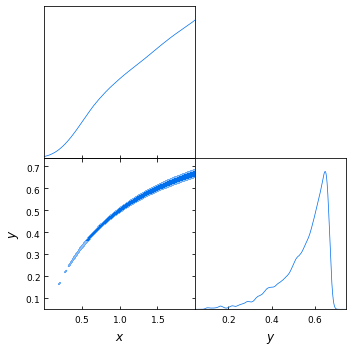

In [52]:
def band_logp(x, y, mean_radius=1, std=0.02):
    """
    Defines a gaussian ring likelihood on cartesian coordinater,
    around some ``mean_radius`` and with some ``std``.
    """
    return stats.norm.logpdf(1/y - 1/x, loc=mean_radius, scale=std)

info_band = {"likelihood": {"band": band_logp}}

info_band["params"] = {
    "x": {"prior": {"min": 0, "max": 2}, "ref": 0.5, "proposal": 0.01},
    "y": {"prior": {"min": 0, "max": 2}, "ref": 0.5, "proposal": 0.01}}
#info_band["prior"] = {"band":
#                 lambda x, y: stats.norm.logpdf(np.sqrt((x-2)**2+(y-2)**2), loc=0, scale=0.3)}

info_band["sampler"] = {"mcmc": {"Rminus1_stop": 0.001, "max_tries": 1000}}
print(info_band)
updated_info_band, sampler_band = run(info_band)

gdsamples_band = MCSamplesFromCobaya(
    updated_info_band, sampler_band.products()["sample"])
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.triangle_plot(gdsamples_band, ["x", "y"], filled=True)

{'likelihood': {'band': <function band_logp at 0x7f503a740940>}, 'params': {'x': {'prior': {'min': 0, 'max': 2}, 'ref': 0.5, 'proposal': 0.01}, 'y': {'prior': {'min': 0, 'max': 2}, 'ref': 0.5, 'proposal': 0.01}}, 'prior': {'band': <function <lambda> at 0x7f503a0136d0>}, 'sampler': {'mcmc': {'Rminus1_stop': 0.01, 'max_tries': 1000}}}
[prior] *WARNING* External prior 'band' loaded. Mind that it might not be normalized!
[band] Initialized external likelihood.
[mcmc] Getting initial point... (this may take a few seconds)
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {band: 12000.0}
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: x:0.5, y:0.5
[mcmc] Sampling!
[mcmc] Progress @ 2022-03-11 11:18:39 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 80 samples accepted.
[mcmc]  - Acceptance rate: 0.143
[mcm

[mcmc] Learn + convergence test @ 2800 samples accepted.
[mcmc]  - Acceptance rate: 0.056
[mcmc]  - Convergence of means: R-1 = 0.048013 after 2240 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 2880 samples accepted.
[mcmc]  - Acceptance rate: 0.056
[mcmc]  - Convergence of means: R-1 = 0.028719 after 2304 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 2960 samples accepted.
[mcmc]  - Acceptance rate: 0.055
[mcmc]  - Convergence of means: R-1 = 0.029800 after 2368 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3040 samples accepted.
[mcmc]  - Acceptance rate: 0.055
[mcmc]  - Convergence of means: R-1 = 0.024619 after 2432 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3120 samples accepted.
[mcmc]  - Acceptance rate: 0.054
[mcmc]  - Convergence of means: R-1 = 0.012681

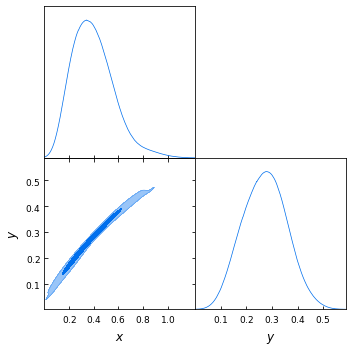

In [55]:
info_band = {"likelihood": {"band": band_logp}}

info_band["params"] = {
    "x": {"prior": {"min": 0, "max": 2}, "ref": 0.5, "proposal": 0.01},
    "y": {"prior": {"min": 0, "max": 2}, "ref": 0.5, "proposal": 0.01}}
info_band["prior"] = {"band":
                 lambda x, y: stats.norm.logpdf(np.sqrt((x)**2+(y)**2), loc=0, scale=0.3)}

info_band["sampler"] = {"mcmc": {"Rminus1_stop": 0.01, "max_tries": 1000}}
print(info_band)
updated_info_band, sampler_band = run(info_band)

gdsamples_band = MCSamplesFromCobaya(
    updated_info_band, sampler_band.products()["sample"])
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.triangle_plot(gdsamples_band, ["x", "y"], filled=True)

On the previous run, I had to increase the $R-1$ stopping threshold in order for the algorithm to converge in 1000 tries. Not only that, but each try seems to take an increasing amount of time despite my PC remaining at near-idle conditions. I think this could be a good example to learn normalizing flows on. But first I would like to learn more about MCMC sampling. Regardless the MCMC converges quickly for gaussian distributions, so this demonstrates why normalizing flows could be helpful.